In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from numpy import linalg as LA
import random
import math

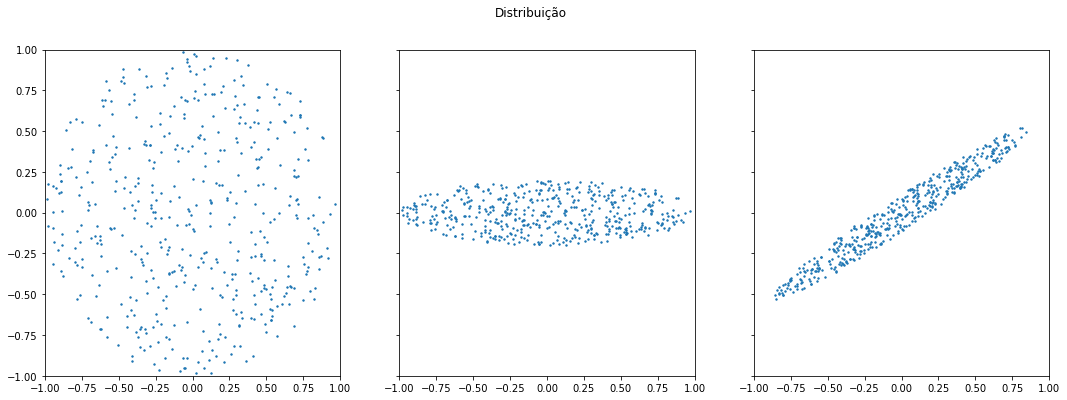

Autovetor 1: [ 0.85774237 -0.51407978]
Lambda 1: 0.2465547460364263
Autovetor 2: [0.51407978 0.85774237]
Lambda 2: 0.0025373567697179328
Eta: 0.9898135800327132


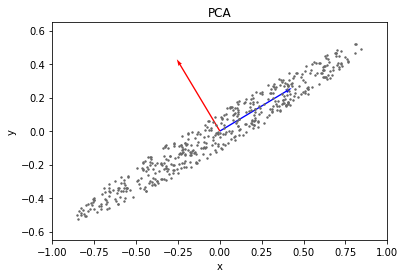

In [20]:
def main():
    pca_preparo = PCA()
    pca_preparo.aleatorios(600)
    pca_preparo.circulo()
    pca_preparo.alongamento()
    pca_preparo.rotacao()
    pca_preparo.covariancia()
    pca_preparo.subplot()
    pca_preparo.eigen()
    pca_preparo.plot()


class PCA:
    def __init__(self):
        self.aleatorios_x = []
        self.aleatorios_y = []
        self.circulo_x = []
        self.circulo_y = []
        self.circulo_y_alongado = []
        self.rotacao_ = []
        self.cov_matrix = []
        self.eigenvalue = []
        self.eigenvector = []
        self.new_circulo_x = []
        self.new_circulo_y = []

    def aleatorios(self,interacoes):
        for i in range(interacoes):
            k = random.uniform(-1,1)
            h = random.uniform(-1,1)
            self.aleatorios_x.append(k)
            self.aleatorios_y.append(h)

    def circulo(self):
        for i in range(len(self.aleatorios_x)):
            k = math.sqrt((self.aleatorios_y[i])**2 + (self.aleatorios_x[i])**2)
            if k <= 1:
                self.circulo_x.append(self.aleatorios_x[i])
                self.circulo_y.append(self.aleatorios_y[i])
            else:
                continue

    def alongamento(self):
        for i in range(len(self.circulo_y)):
            self.circulo_y_alongado.append(0)
        for i in range(len(self.circulo_y)):
            self.circulo_y_alongado[i] = 0.2*self.circulo_y[i]

    def rotacao(self):
        k = np.radians(30)
        rot = [[np.cos(k),np.sin(k)],[np.sin(k),np.cos(k)]]
        self.rotacao_ = np.dot(rot,[self.circulo_x,self.circulo_y_alongado])

    def covariancia(self):
        self.cov_matrix = np.cov(self.rotacao_)

    def eigen(self):
        self.eigenvalue,self.eigenvector = LA.eig(self.cov_matrix)
        self.eigenvalue.sort()
        self.eigenvalue = self.eigenvalue[::-1]
        eta = self.eigenvalue[0]/(sum(self.eigenvalue))
        print('Autovetor 1:',self.eigenvector[0])
        print('Lambda 1:',self.eigenvalue[0])
        print('Autovetor 2:', self.eigenvector[1])
        print('Lambda 2:',self.eigenvalue[1])
        print('Eta:', eta)

    def plot(self):
        origin = [0,0]
        plt.title("PCA")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.quiver(*origin, *self.eigenvector[:,0],color = 'b' ,
            width = 0.004, scale_units='xy', scale=2)
        plt.quiver(*origin, *self.eigenvector[:,1],color = 'r' ,
            width = 0.004, scale_units='xy', scale=2)
        plt.axis('equal')
        plt.scatter(self.rotacao_[0],self.rotacao_[1], s = 2, color = 'dimgrey')
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.show()

    def subplot(self):
        fig, ax = plt.subplots(1,3, figsize=(6*3, 6), sharex = True, sharey = True)
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        fig.suptitle("Distribuição")
        ax[0].scatter(self.circulo_x,self.circulo_y, s = 2)
        ax[0].plot()
        ax[1].scatter(self.circulo_x,self.circulo_y_alongado, s = 2)
        ax[2].scatter(self.rotacao_[0],self.rotacao_[1], s = 2)
        plt.show()

if __name__ == '__main__':
    main()